# Challenge Question

In [ ]:
import pandas as pd
import numpy as np

# Read data
XYtr = pd.read_csv('data/XYtr.csv')

XYtr1 = XYtr.copy() # from stackoverflow

# convert to datetime
XYtr1['cdate'] = pd.to_datetime(XYtr1['cdate'])

XYtr1

In [33]:
# checking for duplicate ids
# inspired by https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

duplicateRowsDF = XYtr1[XYtr1.duplicated(['id'])]

duplicateRowsDF

,id,X.sales,cdate,description,version,symbol,ext,fee1,fee2,total


In [21]:
# data downloaded from https://ethereumprice.org/history/?start=2019-04-26&end=2021-09-29&currency=USD

# package to convert datetime
import datetime

# read in Ethereum data
eth = pd.read_csv('data/ethprice.csv')

# copy dataframe to another
eth1 = eth.copy()

# convert timestamp to actual date instead of integer values
eth1['timestamp'] = pd.to_datetime(eth1['timestamp'], unit = 's')

# sort dataframe so first row is the earliest date
eth1 = eth1.sort_values(by = ['timestamp'], ignore_index = True)

eth1

,timestamp,open,high,low,close
0,2019-04-26,153.705134,159.5249720476912,150.71381121081345,157.86861993879512
1,2019-04-27,157.995247,163.155221326499,156.625572386977,159.56053253353699
2,2019-04-28,159.671166,165.4624530687801,156.16639,159.1648195966502
3,2019-04-29,158.806962,159.8693291870087,153.5987775466163,156.63657242179508
4,2019-04-30,161.379902,164.09,156.79637258694146,163.25832776358433
...,...,...,...,...,...
1021,2021-09-25,2931.037261,2967.89653367546,2815.9772656436626,2922.5723046649273
1022,2021-09-26,2924.081709,3114.9485770081433,2744.0672816629967,3060.543071030628
1023,2021-09-27,3061.965662,3163.6949344394275,2931.6962258382664,2933.820490830925
1024,2021-09-28,2925.769607,2971.003727560695,2794.2317168447034,2804.3907741842313


In [23]:
XYtr2 = XYtr1[['cdate', 'total']].copy()

XYtr2

,cdate,total
0,2019-04-26,0.055
1,2020-10-26,75.000
2,2019-04-26,0.158
3,2019-04-26,1.990
4,2019-04-26,1.000
...,...,...
6909,2020-11-27,0.550
6910,2019-04-26,0.100
6911,2019-05-08,0.966
6912,2021-06-12,0.170


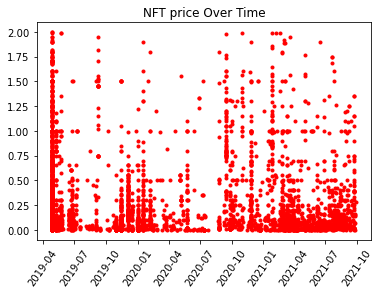

In [134]:
plotdata = XYtr2[XYtr2['total'] < 2]

plt.plot(plotdata['cdate'],plotdata['total'],"r.")
plt.title('NFT price Over Time')
plt.xticks(rotation = 55)
plt.show()

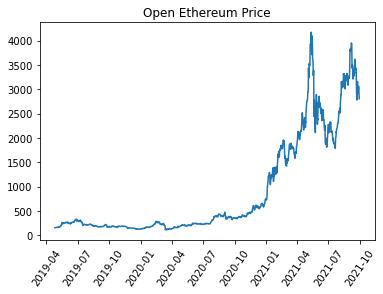

In [71]:
# visualization of eth price

import matplotlib.pyplot as plt

plt.plot(eth1['timestamp'],eth1['open'])
plt.title('Open Ethereum Price')
plt.xticks(rotation = 55)
plt.show()

In [47]:
# combine eth price to nft price based on date
df = XYtr2.merge(eth1, left_on = 'cdate', right_on = 'timestamp')

df

,cdate,total,timestamp,open,high,low,close
0,2019-04-26,0.055,2019-04-26,153.705134,159.5249720476912,150.71381121081345,157.86861993879512
1,2019-04-26,0.158,2019-04-26,153.705134,159.5249720476912,150.71381121081345,157.86861993879512
2,2019-04-26,1.990,2019-04-26,153.705134,159.5249720476912,150.71381121081345,157.86861993879512
3,2019-04-26,1.000,2019-04-26,153.705134,159.5249720476912,150.71381121081345,157.86861993879512
4,2019-04-26,0.006,2019-04-26,153.705134,159.5249720476912,150.71381121081345,157.86861993879512
...,...,...,...,...,...,...,...
6907,2020-12-30,0.488,2020-12-30,734.205508,756.1218324879459,719.9971409502679,752.2462695138959
6908,2020-02-01,0.100,2020-02-01,179.834431,184.122861353669,179.34262548583763,183.62320829671222
6909,2020-11-24,1.590,2020-11-24,608.924823,621.7654232867666,594.1194237540657,605.0422592985864
6910,2020-12-04,0.100,2020-12-04,615.705535,619.5565691120775,567.2975316975184,567.7261201367236


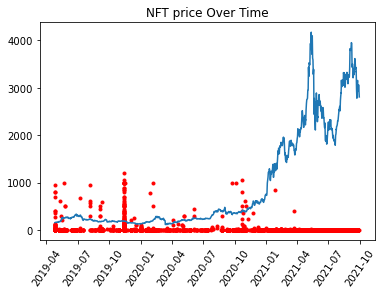

In [72]:
# visualization of the NFT prices

plt.plot(df['cdate'],df['total'],"r.")
plt.plot(eth1['timestamp'],eth1['open'])
plt.title('NFT price Over Time')
plt.xticks(rotation = 55)
plt.show()

In [117]:
from sklearn import preprocessing

x = np.array(df['open']).reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

normdf = pd.DataFrame(x_scaled)
normdf = normdf.rename(columns={0:'normETH'})
normdf

,normETH
0,0.010448
1,0.010448
2,0.010448
3,0.010448
4,0.010448
...,...
6907,0.153391
6908,0.016882
6909,0.122542
6910,0.124212


In [113]:
XYtr2.describe()

,total
count,6914.000000
mean,9.658152
std,73.846736
min,0.000000
25%,0.029338
50%,0.120000
75%,0.450000
max,1195.000000


In [124]:
mdldf = pd.concat([df,normdf],axis = 1)

mdldf1 = mdldf[['cdate','total','normETH']].copy()

mdldf1 = mdldf1[mdldf1['total']<1]

mdldf1

,cdate,total,normETH
0,2019-04-26,0.055,0.010448
1,2019-04-26,0.158,0.010448
4,2019-04-26,0.006,0.010448
5,2019-04-26,0.250,0.010448
6,2019-04-26,0.340,0.010448
...,...,...,...
6906,2021-05-30,0.000,0.535022
6907,2020-12-30,0.488,0.153391
6908,2020-02-01,0.100,0.016882
6910,2020-12-04,0.100,0.124212


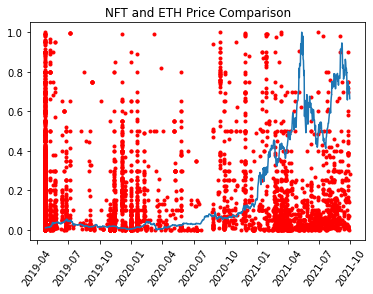

In [116]:
plotdata = XYtr2[XYtr2['total'] < 1]

plt.plot(plotdata['cdate'],plotdata['total'],"r.")
plt.plot(eth1['timestamp'],normdf)
plt.title('NFT and ETH Price Comparison')
plt.xticks(rotation = 55)
plt.show()

0.0002601261817295475


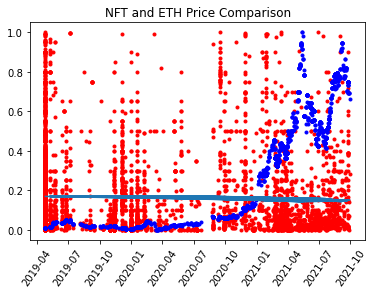

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = np.stack([mdldf1['normETH']], axis = 1)
y = np.stack([mdldf1['total']], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

lin_reg = LinearRegression(fit_intercept = True)

lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_valid,y_valid))

plt.plot(mdldf1['cdate'],mdldf1['total'],"r.")
plt.plot(mdldf1['cdate'],mdldf1['normETH'],"b.")
plt.plot(mdldf1['cdate'],lin_reg.predict(X))
plt.title('NFT and ETH Price Comparison')
plt.xticks(rotation = 55)
plt.show()

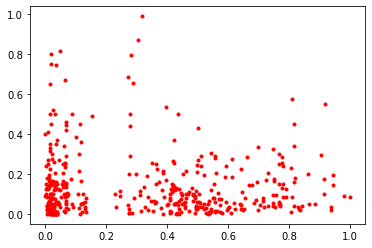

In [142]:
mdldf2 = mdldf1.copy()

mdldf2 = mdldf2.groupby('cdate').mean()

plt.plot(mdldf2['normETH'],mdldf2['total'],"r.")
plt.show()

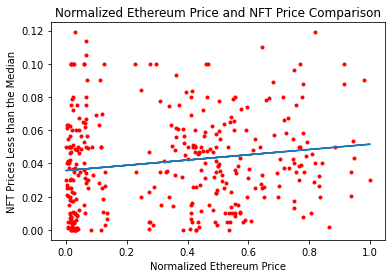

In [196]:
mdldf3 = mdldf[['cdate','total','normETH']].copy()
mdldf3 = mdldf3[mdldf3['total']<0.12]
mdldf3 = mdldf3.groupby('cdate').mean()

X = np.stack([mdldf3['normETH']], axis = 1)
y = np.stack([mdldf3['total']], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

lin_reg = LinearRegression(fit_intercept = True)

lin_reg.fit(X_train, y_train)
# print(lin_reg.score(X_valid,y_valid))

plt.plot(mdldf3['normETH'],mdldf3['total'],"r.")
plt.plot(X,lin_reg.predict(X))
plt.xlabel('Normalized Ethereum Price')
plt.ylabel('NFT Prices Less than the Median')
plt.title('Normalized Ethereum Price and NFT Price Comparison')
plt.show()

In [187]:
XYtr2.describe()

,total
count,6914.000000
mean,9.658152
std,73.846736
min,0.000000
25%,0.029338
50%,0.120000
75%,0.450000
max,1195.000000


0.04856187659222844


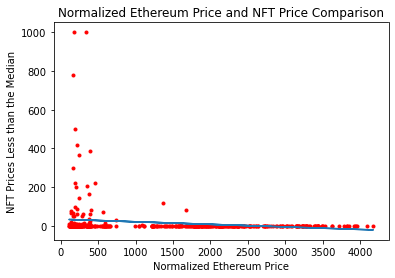

In [194]:
mdldf3 = mdldf[['cdate','total','open']].copy()
# mdldf3 = mdldf3[mdldf3['total']<0.12]
mdldf3 = mdldf3.groupby('cdate').mean()

X = np.stack([mdldf3['open']], axis = 1)
y = np.stack([mdldf3['total']], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

lin_reg = LinearRegression(fit_intercept = True)

lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_valid,y_valid))

plt.plot(mdldf3['open'],mdldf3['total'],"r.")
plt.plot(X,lin_reg.predict(X))
plt.xlabel('Normalized Ethereum Price')
plt.ylabel('NFT Prices Less than the Median')
plt.title('Normalized Ethereum Price and NFT Price Comparison')
plt.show()